### Transforming The Oscars Dataset for SQL work

How to clean a CSV dataset and add it to a SQLite database. 

![alt text](http://bensbargains.com/thecheckout/wp-content/uploads/2016/02/leo-oscars.jpg "The Oscars")

The Academy Awards, also known as the Oscars, is an annual awards ceremony hosted to recognize the achievements in the film industry. There are many different awards categories and the members of the academy vote every year to decide which artist or film should get the award.

### Import the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
academy_awards = pd.read_csv("academy_awards.csv", encoding = "ISO-8859-1")


In [2]:
academy_awards.columns

Index(['Year', 'Category', 'Nominee', 'Additional Info', 'Won?', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

**Column Description**:

**Year** - the year of the awards ceremony.

**Category** - the category of award the nominee was nominated for.

**Nominee** - the person nominated for the award.

**Additional Info** - this column contains additional info like:

1. the movie the nominee participated in.
2. the character the nominee played (for acting awards).

**Won?** - this column contains either YES or NO depending on if the nominee won the award.

In [3]:
academy_awards.head()

,Year,Category,Nominee,Additional Info,Won?,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2010 (83rd),Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},NO,NaN,NaN,NaN,NaN,NaN,NaN
1,2010 (83rd),Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},NO,NaN,NaN,NaN,NaN,NaN,NaN
2,2010 (83rd),Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},NO,NaN,NaN,NaN,NaN,NaN,NaN
3,2010 (83rd),Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},YES,NaN,NaN,NaN,NaN,NaN,NaN
4,2010 (83rd),Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},NO,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
academy_awards.shape

(10137, 11)

In [5]:
ac_aw_col_nullcount = {}
academy_awards_cols = academy_awards.columns.tolist()
for col in academy_awards_cols:
    ac_aw_col_nullcount[col] = len(academy_awards[academy_awards[col].isnull()])
ac_aw_col_nullcount    

{'Additional Info': 1126,
 'Category': 0,
 'Nominee': 0,
 'Unnamed: 10': 10136,
 'Unnamed: 5': 10126,
 'Unnamed: 6': 10125,
 'Unnamed: 7': 10134,
 'Unnamed: 8': 10135,
 'Unnamed: 9': 10136,
 'Won?': 0,
 'Year': 0}

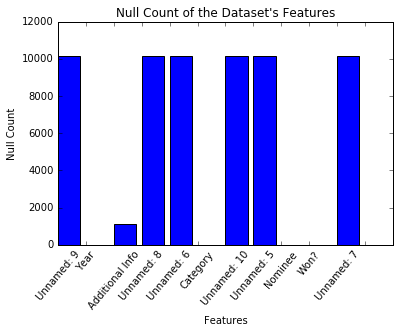

In [6]:
plt.bar(range(0,len(ac_aw_col_nullcount)),list(ac_aw_col_nullcount.values()))
plt.xticks(range(0,12),list(ac_aw_col_nullcount.keys()), rotation = 50)
plt.xlabel("Features")
#plt.xticklabel()
plt.ylabel("Null Count")
plt.title("Null Count of the Dataset's Features")
plt.show()

Five of the Unnamed columns are pratically full of null entries--this is a concern.

### Filtering the Data

In [7]:
#Get the years of Year column and convert them to integers
academy_awards["Year"] = academy_awards["Year"].str[0:4].astype(int)

We select the rows that are after Year 2000 and call the dataframe _later than 2000_


In [8]:
later_than_2000 = academy_awards[academy_awards["Year"]>2000]

In [9]:
award_categories = ["Actor -- Leading Role",
"Actor -- Supporting Role",
"Actress -- Leading Role",
"Actress -- Supporting Role",]

In [10]:
nominations = later_than_2000[later_than_2000["Category"].isin(award_categories)]

In [11]:
nominations.head(3)

,Year,Category,Nominee,Additional Info,Won?,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2010,Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},NO,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},NO,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},NO,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning up _The Won?_ and _Unnamed_ Columns

We will transform the _Won?_ column to 0 and 1 boolean values and drop the null-ridden _Unnamed_ Columns

In [12]:
#Binary Entries for "Won?" column
replace_dict = { "YES": 1, "NO": 0 }
academy_awards["Won?"] = academy_awards["Won?"].map(replace_dict)

In [13]:
academy_awards["Won"] =academy_awards["Won?"] 

In [14]:
drop_col_ls = ["Won?",
"Unnamed: 5",
"Unnamed: 6",
"Unnamed: 7",
"Unnamed: 8",
"Unnamed: 9",
"Unnamed: 10",]

In [15]:
#Drop the columns suggested from drop_col_ls list
final_academy_awards = academy_awards.drop(drop_col_ls, axis =1)

In [16]:
final_academy_awards

,Year,Category,Nominee,Additional Info,Won
0,2010,Actor -- Leading Role,Javier Bardem,Biutiful {'Uxbal'},0.0
1,2010,Actor -- Leading Role,Jeff Bridges,True Grit {'Rooster Cogburn'},0.0
2,2010,Actor -- Leading Role,Jesse Eisenberg,The Social Network {'Mark Zuckerberg'},0.0
3,2010,Actor -- Leading Role,Colin Firth,The King's Speech {'King George VI'},1.0
4,2010,Actor -- Leading Role,James Franco,127 Hours {'Aron Ralston'},0.0
5,2010,Actor -- Supporting Role,Christian Bale,The Fighter {'Dicky Eklund'},1.0
6,2010,Actor -- Supporting Role,John Hawkes,Winter's Bone {'Teardrop'},0.0
7,2010,Actor -- Supporting Role,Jeremy Renner,The Town {'James Coughlin'},0.0
8,2010,Actor -- Supporting Role,Mark Ruffalo,The Kids Are All Right {'Paul'},0.0
9,2010,Actor -- Supporting Role,Geoffrey Rush,The King's Speech {'Lionel Logue'},0.0


### Cleaning Up the _Additional Info_ Column

In [17]:
additional_info_one = final_academy_awards["Additional Info"].str.rstrip("'}")

In [18]:
additional_info_two = additional_info_one.str.split(" {'")
movie_names = additional_info_two.str[0]
characters = additional_info_two.str[1]
final_academy_awards["Movie"] = movie_names
final_academy_awards["Character"] = characters
final_academy_awards = final_academy_awards.drop("Additional Info", axis=1)
final_academy_awards

,Year,Category,Nominee,Won,Movie,Character
0,2010,Actor -- Leading Role,Javier Bardem,0.0,Biutiful,Uxbal
1,2010,Actor -- Leading Role,Jeff Bridges,0.0,True Grit,Rooster Cogburn
2,2010,Actor -- Leading Role,Jesse Eisenberg,0.0,The Social Network,Mark Zuckerberg
3,2010,Actor -- Leading Role,Colin Firth,1.0,The King's Speech,King George VI
4,2010,Actor -- Leading Role,James Franco,0.0,127 Hours,Aron Ralston
5,2010,Actor -- Supporting Role,Christian Bale,1.0,The Fighter,Dicky Eklund
6,2010,Actor -- Supporting Role,John Hawkes,0.0,Winter's Bone,Teardrop
7,2010,Actor -- Supporting Role,Jeremy Renner,0.0,The Town,James Coughlin
8,2010,Actor -- Supporting Role,Mark Ruffalo,0.0,The Kids Are All Right,Paul
9,2010,Actor -- Supporting Role,Geoffrey Rush,0.0,The King's Speech,Lionel Logue


### Exporting to SQLite

In [19]:
import sqlite3

In [21]:
#to_sql METHOD
#----------------
#Pandas creates a table and used the first parameter to name it.

#Pandas uses the data types of each of the columns in each df to create
#a SQLite schema for this table.

#After creating the table, Pandas creates a large INSERT query and runs
#it to insert the values into the table
#------------------------------

#We create a database from scratch.
#If python cannot connect to a filepath that does not exist yet, it creates1
conn = sqlite3.connect("nominations.db")
#to_sql(table, connection to database, index)
final_academy_awards.to_sql("nominations",conn, index=False)

### Verify in SQL

In [31]:
t_info = "pragma table_info(nominations);"
print(conn.execute(t_info).fetchall())

[(0, 'Year', 'INTEGER', 0, None, 0), (1, 'Category', 'TEXT', 0, None, 0), (2, 'Nominee', 'TEXT', 0, None, 0), (3, 'Won', 'REAL', 0, None, 0), (4, 'Movie', 'TEXT', 0, None, 0), (5, 'Character', 'TEXT', 0, None, 0)]


In [36]:
query_first10 = "SELECT * FROM nominations LIMIT 10;"
print(conn.execute(query_first10).fetchall())

[(2010, 'Actor -- Leading Role', 'Javier Bardem', 0.0, 'Biutiful', 'Uxbal'), (2010, 'Actor -- Leading Role', 'Jeff Bridges', 0.0, 'True Grit', 'Rooster Cogburn'), (2010, 'Actor -- Leading Role', 'Jesse Eisenberg', 0.0, 'The Social Network', 'Mark Zuckerberg'), (2010, 'Actor -- Leading Role', 'Colin Firth', 1.0, "The King's Speech", 'King George VI'), (2010, 'Actor -- Leading Role', 'James Franco', 0.0, '127 Hours', 'Aron Ralston'), (2010, 'Actor -- Supporting Role', 'Christian Bale', 1.0, 'The Fighter', 'Dicky Eklund'), (2010, 'Actor -- Supporting Role', 'John Hawkes', 0.0, "Winter's Bone", 'Teardrop'), (2010, 'Actor -- Supporting Role', 'Jeremy Renner', 0.0, 'The Town', 'James Coughlin'), (2010, 'Actor -- Supporting Role', 'Mark Ruffalo', 0.0, 'The Kids Are All Right', 'Paul'), (2010, 'Actor -- Supporting Role', 'Geoffrey Rush', 0.0, "The King's Speech", 'Lionel Logue')]


In [ ]:
conn.close()